<a href="https://colab.research.google.com/github/sk-6113/FUTURE_DS_03/blob/main/FUTURE_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB

Summary statistics:


,SN,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,10.500000,14.310345,92.517241,0.527586,1.187931,2.537931,5.082759,4.974138
std,5.771259,16.488031,114.491780,1.305336,1.686334,3.193302,7.288293,6.494931
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,3.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,10.500000,7.000000,42.000000,0.000000,0.000000,1.000000,3.000000,3.000000
75%,15.250000,17.000000,123.000000,1.000000,2.000000,3.250000,6.000000,6.000000
max,20.000000,74.000000,559.000000,19.000000,8.000000,26.000000,52.000000,38.000000



Missing values in each column:
SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
dtype: int64


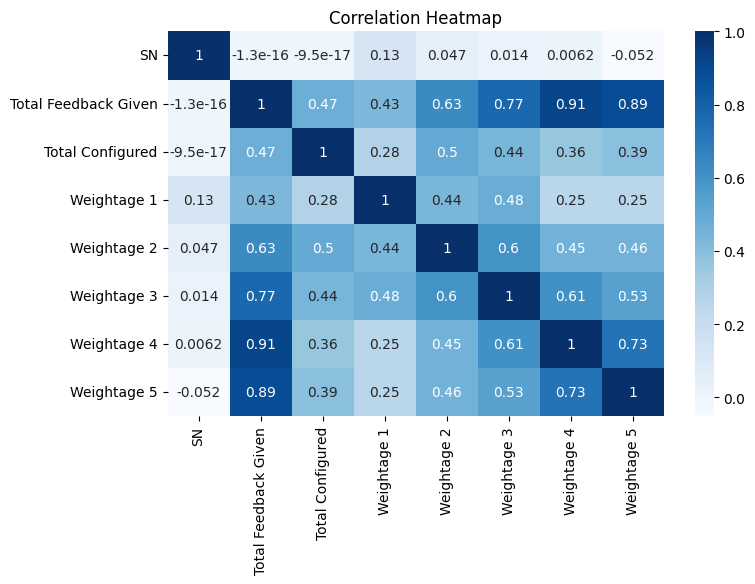

In [ ]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/Student_Satisfaction_Survey.csv"
df = pd.read_csv(file_path, encoding='latin-1')

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset info:")
df.info()

print("\nSummary statistics:")
display(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

if "Satisfaction_Rating" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Satisfaction_Rating", data=df, palette="viridis")
    plt.title("Distribution of Satisfaction Ratings")
    plt.xlabel("Satisfaction Rating")
    plt.ylabel("Number of Students")
    plt.show()

    if "Event_Type" in df.columns:
        plt.figure(figsize=(8,5))
        sns.barplot(x="Event_Type", y="Satisfaction_Rating", data=df, palette="coolwarm", ci=None)
        plt.title("Average Satisfaction by Event Type")
        plt.xticks(rotation=45)
        plt.show()

if "Feedback" in df.columns:
    from collections import Counter
    import re

    all_feedback = " ".join(str(f) for f in df["Feedback"] if pd.notnull(f))
    words = re.findall(r'\w+', all_feedback.lower())
    common_words = Counter(words).most_common(20)
    print("\nTop 20 most common words in feedback:")
    for word, freq in common_words:
        print(f"{word}: {freq}")

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

if "Satisfaction_Rating" in df.columns and "Feedback" in df.columns:
    avg_rating = df["Satisfaction_Rating"].mean()
    print(f"\nAverage Satisfaction Rating: {avg_rating:.2f}")
    if avg_rating < 3:
        print("Overall satisfaction is low. Consider improving event planning, venue quality, and engagement activities.")
    elif avg_rating < 4:
        print("Satisfaction is moderate. Focus on addressing the most common concerns from feedback.")
    else:
        print("Satisfaction is high. Continue the good work, but address small recurring issues mentioned in feedback.")